# Due July/4/2018 11:59:59 PM, PST.

### Kernel (10%)

Could you prove or disprove by counter example about following constructed functions (left hand side) are kernels or not? All right hand side functions $K_$ are assumed kernels already. Notaions: $x, z$ are $n$-dim vectors. $a$ is a positive real number. $f : \mathbb{R}^{n} -> \mathbb{R}$ is a real-valued function. $\phi : \mathbb{R}^{n} -> \mathbb{R}^{n}$ is a $n$-dim to $n$-dim function.  

(a) $K(x; z) = K_1(x; z) + K_2(x; z)$
<br>
(b) $K(x; z) = K_1(x; z) - K_2(x; z)$
<br>
(c) $K(x; z) = aK_1(x; z)$
<br>
(d) $K(x; z) = -aK_1(x; z)$
<br>
(e) $K(x; z) = K_1(x; z)K_2(x; z)$
<br>
(f) $K(x; z) = f(x)f(z)$
<br>
(g) $K(x; z) = K_3(\phi(x); \phi(z))$
<br>
(h) $K(x; z) = p(K_1(x; z))$, where $p$ is a polynomial



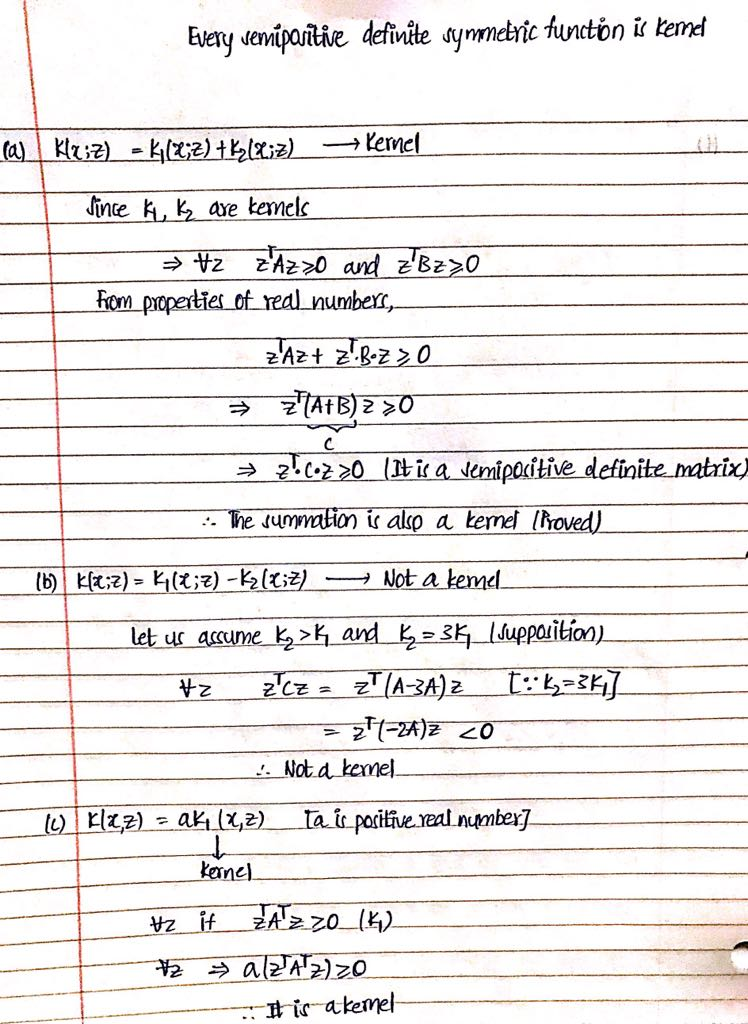

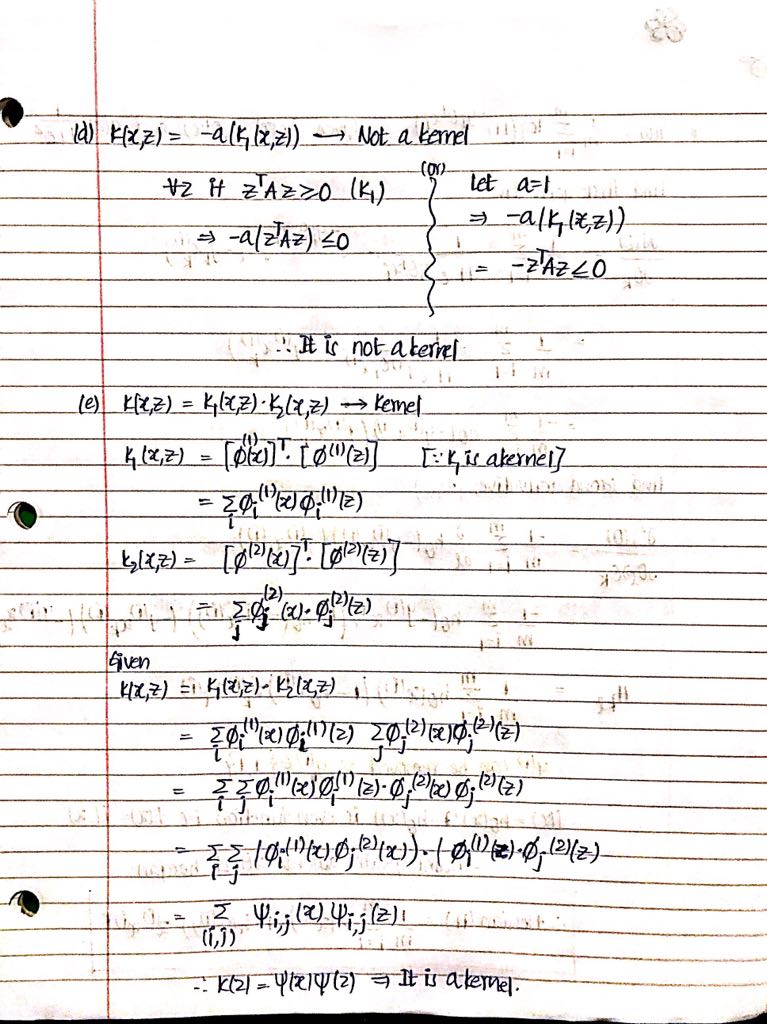

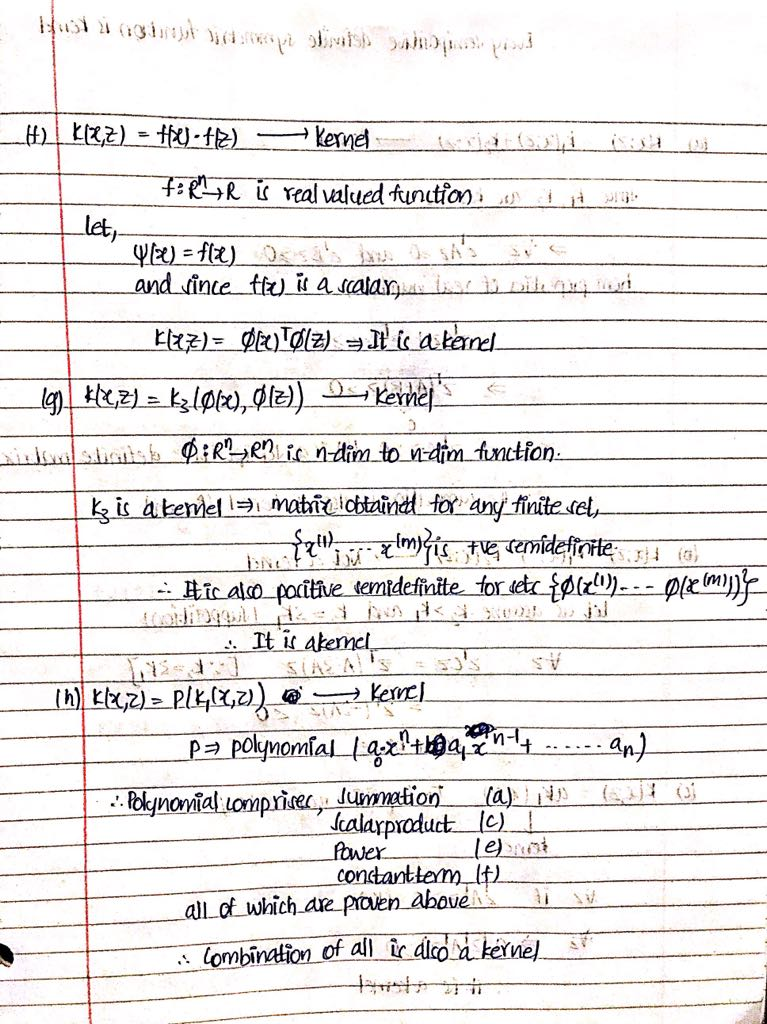

In [17]:
from IPython.display import Image,display
list_of_images = ['data/kernel1.JPEG', 'data/kernel2.JPEG', 'data/kernel3.JPEG']
for img in list_of_images:
    display(Image(filename=img))

### VC Dimension (10%)

(a) Let two hypothesis classes $H_1$ and $H_2$ satisfy $H_1 \in H_2$. Prove or disprove: $VC(H_1) \leq VC(H_2)$.

(b) Let $H_1 = H_2 \cup H_3$. Prove or disprove: $VC(H_1) \leq  VC(H_2) + VC(H_3)$.

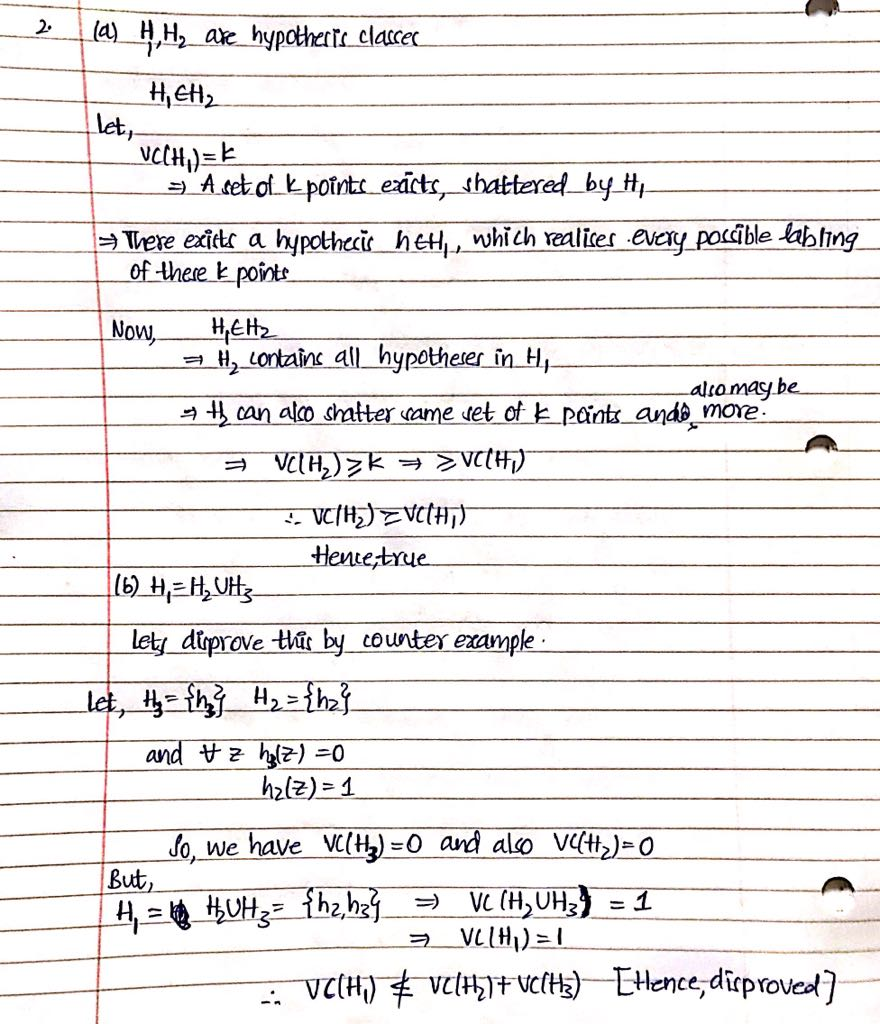

In [18]:
from IPython.display import Image
Image(filename='data/VC.JPEG')

### Building Decision Tree (30%)

In this assignment, we try to build decision tree from scratch. We will separate this task into following subtasks.
1. Gini Index

2. Create Split based on Gini Index

3. Build Tree

4. Make a Prediction

5. Case study by Decision Tree Built


### 1. Gini Index

A Gini score gives an idea of how good a split is by measuring how mixed the classes are in the two groups created by the split. A gini index for classifying two classes (attributes) into two groups can be represented as 

$$
\begin{align}
gini_{index} &= propor\_class\_0\_at\_gp\_1 \times (1 - propor\_class\_0\_at\_gp\_1)) \\
             &+ propor\_class\_1\_at\_gp\_1 \times (1 - propor\_class\_1\_at\_gp\_1)) \\
             &+ propor\_class\_0\_at\_gp\_2 \times (1 - propor\_class\_0\_at\_gp\_2)) \\
             &+ propor\_class\_1\_at\_gp\_2 \times (1 - propor\_class\_1\_at\_gp\_2))
\end{align}
$$

You can try use groups of datasets and class values as input, and return gini index based.


In [19]:
def cal_giniindex(groups, classes):
    totalcount = 0
    gini_index = 0.0
    
    for group in groups:
        totalcount+= len(group)
            
    for group in groups:
        
        groupsize = len(group)
        gini_group = 0.0
        entriesList = []
        
        if(groupsize != 0):
            
                for entry in group:
                    entriesList.append(entry[-1])
                    
                for class_value in classes:
                    proportion = (entriesList.count(class_value))/groupsize
                    gini_group += proportion*(1-proportion)
    
                gini_index += gini_group*(groupsize/totalcount)
        
    return gini_index

gini_index= cal_giniindex( [[[0, 0], [1, 0]], [[0, 1], [1, 1]]], [0, 1] )
print(gini_index)

gini_index= cal_giniindex([[[0, 1], [1, 0]], [[0, 1], [0, 0]]], [0, 1])
print(gini_index)

0.0
0.5


### 2. Create Split based on Gini Index

In this part, you will try to split a dataset and evaluate all splits to select best feature and its best splitting point. Best means to have smallest gini index.

Given following data with 10 rows and each row contains two features X1 and X2, label by variable Y (0 or 1). Could you write a code to fine the best feature and best splitting points? 


In [20]:
def split_data(index, value, dataset):
    leftgroup, rightgroup = list(), list()
    #iterate through entire data set and split data based on a particular column/attribute
    for entry in dataset:
        if entry[index] < value:
            leftgroup.append(entry)
        else:
            rightgroup.append(entry)
    return leftgroup, rightgroup

def best_split(dataset):
    
    class_set = set()
    for entry in dataset:
        entry_length = len(entry)
        class_set.add(entry[-1])
    classes = list (class_set)
    
    best_score, best_groups = 999, []
    
    for index in range(entry_length-1):
        for entry in dataset:
            groups = split_data(index, entry[index], dataset)
            gini_index = cal_giniindex(groups, classes)
            
            if gini_index < best_score:
                best_index, best_value, best_score, best_groups = index, entry[index], gini_index, groups
                
    return {'index':best_index, 'value':best_value, 'groups':best_groups}

In [21]:
# [X1, X2, Y] 
dataset = [
            [2.771244718,1.784783929,0],
            [1.728571309,1.169761413,0],
            [3.678319846,2.81281357,0],
            [3.961043357,2.61995032,0],
            [2.999208922,2.209014212,0],
            [7.497545867,3.162953546,1],
            [9.00220326,3.339047188,1],
            [7.444542326,0.476683375,1],
            [10.12493903,3.234550982,1],
            [6.642287351,3.319983761,1] 
          ]

split = best_split(dataset)
print("Data is divided in to partitions as", "\n", split['groups'][0],"\n", split['groups'][1])
print('Best Feature is X%d with best split value as X%d < %f' % ((split['index']+1), (split['index']+1), split['value']))

Data is divided in to partitions as 
 [[2.771244718, 1.784783929, 0], [1.728571309, 1.169761413, 0], [3.678319846, 2.81281357, 0], [3.961043357, 2.61995032, 0], [2.999208922, 2.209014212, 0]] 
 [[7.497545867, 3.162953546, 1], [9.00220326, 3.339047188, 1], [7.444542326, 0.476683375, 1], [10.12493903, 3.234550982, 1], [6.642287351, 3.319983761, 1]]
Best Feature is X1 with best split value as X1 < 6.642287


### 3. Build Tree
Building a tree may be divided into 3 main parts:
A. Terminal Nodes. (Can use two criteriosn, (1) maximum tree depth or (2) use minimum rows required to be contained by a node)
B. Recursive Splitting.
C. Building a Tree.

For same dataset as above, could you show a tree with depth 2? 

In [22]:
# Convert to terminal node
def terminal_node(group):
    resultset = [row[-1] for row in group]
    return max(set(resultset), key=resultset.count)

# Show DT
def show_tree(node, depth=0):
    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
        show_tree(node['left'], depth+1)
        show_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))

# Grow child nodes or make terminal nodes
def grow_childs(root_node, depth, size, curr_depth):
    leftgroup, rightgroup = root_node['groups']
    del(root_node['groups'])
    # Check if right or left groups is empty
    if not leftgroup or not rightgroup:
        root_node['left'] = root_node['right'] = terminal_node(leftgroup + rightgroup)
        return
    # Check if current depth exceeds maximum depth
    if curr_depth >= depth:
        root_node['left'], root_node['right'] = terminal_node(leftgroup), terminal_node(rightgroup)
        return
    # Grow left side
    if len(leftgroup) <= size:
        root_node['left'] = terminal_node(leftgroup)
    else:
        root_node['left'] = best_split(leftgroup)
        grow_childs(root_node['left'], depth, size, curr_depth+1)
    # Grow right side
    if len(rightgroup) <= size:
        root_node['right'] = terminal_node(rightgroup)
    else:
        root_node['right'] = best_split(rightgroup)
        grow_childs(root_node['right'], depth, size, curr_depth+1)
        
# Construct a DT
def construct_tree(dataset, depth, size):
    root_node = best_split(dataset)
    grow_childs(root_node, depth, size, 1)
    return root_node

In [23]:
# [X1, X2, Y] 
dataset = [ [2.771244718,1.784783929,0],
            [1.728571309,1.169761413,0],
            [3.678319846,2.81281357,0],
            [3.961043357,2.61995032,0],
            [2.999208922,2.209014212,0],
            [7.497545867,3.162953546,1],
            [9.00220326,3.339047188,1],
            [7.444542326,0.476683375,1],
            [10.12493903,3.234550982,1],
            [6.642287351,3.319983761,1]
          ]
#constructing a tree with depth 2
root_node = construct_tree(dataset, 2, 1)
show_tree(root_node)

[X1 < 6.642]
 [X1 < 2.771]
  [0]
  [0]
 [X1 < 7.498]
  [1]
  [1]


### 4. Make a Prediction
Given following test dataset, could you use the just built tree to make prediction?  

In [24]:
def make_prediction(root, entry):
    if entry[root['index']] < root['value']:
        if isinstance(root['left'], dict):
            return make_prediction(root['left'], entry)
        else:
            return root['left']
    else:
        if isinstance(root['right'], dict):
            return make_prediction(root['right'], entry)
        else:
            return root['right']

In [25]:
test_dataset = [
[1.771244718,1.784783929,0],
[2.728571309,1.169761413,0],
[2.678319846,2.81281357,0],
[2.961043357,2.61995032,0],
[2.999208922,2.209014212,0],
[0.497545867,3.162953546,0],
[8.00220326,3.339047188,1],
[8.444542326,0.476683375,1],
[10.12493903,3.234550982,1],
[7.642287351,3.319983761,1]
]

#  predict with the decision stump
root = {'index': 0, 'right': 1, 'value': 6.642287351, 'left': 0}
for entry in test_dataset:
    prediction = make_prediction(root, entry)
    print('Actual Label is %d, Predicted Label is %d' % (entry[-1], prediction))

Actual Label is 0, Predicted Label is 0
Actual Label is 0, Predicted Label is 0
Actual Label is 0, Predicted Label is 0
Actual Label is 0, Predicted Label is 0
Actual Label is 0, Predicted Label is 0
Actual Label is 0, Predicted Label is 0
Actual Label is 1, Predicted Label is 1
Actual Label is 1, Predicted Label is 1
Actual Label is 1, Predicted Label is 1
Actual Label is 1, Predicted Label is 1


### 5. Case study by Decision Tree Built

Using the provided dataset about banknote authentication (data_banknote_authentication.csv) file
with following attributes. Please using developed decision tree to make prediction and evaluate your model.



In [26]:
from random import seed
from random import randrange
from csv import reader

# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Split the data into 10 folds
def cross_validation_split(dataset, n_folds):
    dataset_split = []
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = []
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split

# Calculate accuracy per each fold
def accuracy_fold(expected, predicted):
    correct_count = 0
    for i in range(len(expected)):
        if expected[i] == predicted[i]:
            correct_count += 1
    return correct_count / float(len(expected)) * 100.0

# Evaluate the decision tree alogorithm with 10 folds and maximum depth 6 and minimum size 8
def evaluate_algorithm(dataset, decisiontree_algo, n_folds, max_depth, min_size):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        #copy row by row from fold to test data set and make the result column zero
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = decisiontree_algo(train_set, test_set, max_depth, min_size)
        expected = [row[-1] for row in fold]
        accuracy = accuracy_fold(expected, predicted)
        scores.append(accuracy)
    return scores


# Construct DT and Generate predictions from test data
def decision_tree(train, test, max_depth, min_size):
    tree = construct_tree(train, max_depth, min_size)
    predictions = []
    for row in test:
        prediction = make_prediction(tree, row)
        predictions.append(prediction)
    return(predictions)

seed(1)
# load and prepare data from dataset in data folder
file = open('data/data_banknote_authentication.csv', "r")
lines = reader(file)
dataset = list(lines)
# convert string attributes to integers
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
    
scores = evaluate_algorithm(dataset, decision_tree, 10, 6, 8)
print('Indiviual Score over each fold is : %s' % scores)
print('Average Accuracy over 10 folds is : %.3f%%' % (sum(scores)/float(len(scores))))

Indiviual Score over each fold is : [99.27007299270073, 98.54014598540147, 99.27007299270073, 97.8102189781022, 97.8102189781022, 98.54014598540147, 96.35036496350365, 97.08029197080292, 99.27007299270073, 96.35036496350365]
Average Accuracy over 10 folds is : 98.029%


### SVM Classifier (20%)
### Given iris data set (at sklearn datasets), could you compare classification results by plotting decision boundary for classifiers  linear, RBF (set kernel coefficient 5), and Polynomial (set degree 2) ? You can utilze sklearn svm. 

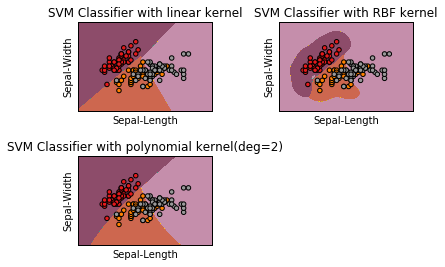

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline

iris = datasets.load_iris()
#considering only 2 features
X = iris.data[:, :2] 
y = iris.target
h = .01  # step size in graph
#create mesh grid of sepal length vrs width
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

C = 2.0  # SVM regularization parameter

svc = svm.SVC(kernel='linear', C=C).fit(X, y) # Linear Kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=5.0, C=C).fit(X, y) # RBF Kernel
poly_svc = svm.SVC(kernel='poly', degree=2, C=C).fit(X, y) # Polynomial Kernel

# Plot titles
titles = ['SVM Classifier with linear kernel',
          'SVM Classifier with RBF kernel',
          'SVM Classifier with polynomial kernel(deg=2)']


for i, classifier in enumerate((svc, rbf_svc, poly_svc)):
    #grid of 4 images and spacing options
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    Z = classifier.predict(X_plot)

    # Place the outcome to coloured plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Set1)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.xlabel('Sepal-Length')
    plt.ylabel('Sepal-Width')
    plt.title(titles[i])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

plt.show()

### Bootstrap Aggregation (30%)

Decision trees are a simple and powerful predictive modeling technique, but they often have high-variance problem. In this exercise, we will implement a bootstrap aggregation algorithm for decision trees. We will implment sample with replacement and use this to build a serieous of tree models for prediction. 

### Bootstrap Resample (With Replacement)

Can you write a function to implement resampling with replacement? 
For example, could you show different sample mean for different sample sizes for 
following data?  

In [28]:
from random import seed
from random import random
from random import randrange


# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
    sample = []
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample


# Calculate the mean
def mean(dataset):
    total=0.0
    for entry in dataset:
            total += entry
    mean = total / (len(dataset))
    return mean


seed(1)
dataset = [randrange(30) for i in range(20)]
print("The dataset used for mean calculation is ", dataset)
print('Actual Mean: %.3f' % mean(dataset))
ratio = 0.15
for size in [1, 10, 100]:
    sample_means = []
    for i in range(size):
        sample = subsample(dataset, ratio)
        sample_mean = mean(sample)
        sample_means.append(sample_mean)
    print('No. of Samples=%d, Estimated Mean: %.3f' % (size, mean(sample_means)))

The dataset used for mean calculation is  [4, 18, 27, 25, 24, 2, 8, 3, 15, 24, 14, 15, 20, 12, 25, 6, 3, 15, 0, 28]
Actual Mean: 14.400
No. of Samples=1, Estimated Mean: 20.000
No. of Samples=10, Estimated Mean: 10.567
No. of Samples=100, Estimated Mean: 13.553


### Building aggregated tree models.

Could you use samples with replacement to bagging predict the data (sonar.all-data.csv)?
Try to compare accuracy results for different bags size. For example, compare
average prediction results for bags with tree numbers say, 1, 5, 10, 50.

Data attributes, more details can be found at https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)



In [32]:
from random import seed
from random import randrange
from csv import reader

# Load data from sonar dataset in data folder
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

# Convert string to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string to int
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup

# Evaluate the bagging algorithm 
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_fold(actual, predicted)
        scores.append(accuracy)
    return scores

# Make a prediction
def bagging_predict(trees, row):
    predictions = [make_prediction(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)

# Bootstrap Algorithm
def bagging(train, test, max_depth, min_size, sample_size, n_trees):
    trees = list()
    for i in range(n_trees):
        sample = subsample(train, sample_size)
        tree = construct_tree(sample, max_depth, min_size)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return(predictions)

#data collection and transformation
seed(1)
filename = 'data/sonar.all-data.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
str_column_to_int(dataset, len(dataset[0])-1)

# Algorithm evaluation
n_folds = 6
max_depth = 7
min_size = 3
sample_size = 0.50
for n_trees in [1, 5, 10, 50]:
    scores = evaluate_algorithm(dataset, bagging, n_folds, max_depth, min_size, sample_size, n_trees)
    print('No of Trees: %d' % n_trees)
    print('Accuracy score per each fold: %s' % scores)
    print('Average Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

No of Trees: 1
Accuracy score per each fold: [70.58823529411765, 67.64705882352942, 67.64705882352942, 58.82352941176471, 82.35294117647058, 61.76470588235294]
Average Accuracy: 68.137%
No of Trees: 5
Accuracy score per each fold: [76.47058823529412, 76.47058823529412, 58.82352941176471, 73.52941176470588, 73.52941176470588, 73.52941176470588]
Average Accuracy: 72.059%
No of Trees: 10
Accuracy score per each fold: [79.41176470588235, 70.58823529411765, 76.47058823529412, 88.23529411764706, 64.70588235294117, 85.29411764705883]
Average Accuracy: 77.451%
No of Trees: 50
Accuracy score per each fold: [67.64705882352942, 85.29411764705883, 85.29411764705883, 82.35294117647058, 73.52941176470588, 85.29411764705883]
Average Accuracy: 79.902%
